In [9]:
# Eri Osta
# ads829

## Lab 2B

<em>Lab 2 consists of two exercises. This is the second of two exercises in Lab 2, which will cover ```DataFrame```s and Seaborn. This exercise will also use the Yahoo finance module. </em>

In this exercise, you will investigate the trading around two popular stocks of 2021: AMC Entertainment (AMC) and GameStop (GME). 

### Tasks

Complete the following tasks:

1. The starter code has been created for you. 
2. Using the Yahoo Finance module, download the stock data for the stocks AMC and GME between December 1, 2021 and around the day you started this exercise (June or July 2021) in intervals of one day. You will focus only on the ```Close``` price and ```Volume``` traded. 
3. Using the data downloaded from ```yfinance```, create a new ```DataFrame``` that contains these five columns: ```Day```, ```AMC Close```, ```AMC Volume```, ```GME Close```, and```GME Volume```. Note the index for the ```DataFrame``` is the YYYY-MM-DD date, but you will need to make it a column. 
4. Apply ```pd.melt()``` to this new ```DataFrame``` created in Step 3, such that the ```Day``` column is kept. The variable column will contain either ```AMC Close```, ```AMC Volume```, ```GME Close```, and```GME Volume```. Rename this column to ```'Type'```. The values column will contain either the closing price or the volume traded for the respective stock on that day. 
5. Create a FacetGrid of four lineplots on the stock data using the ```DataFrame``` generated in Step 4. Each lineplot will show either the closing prices or volume traded over the days within the time frame. The FacetGrid will separate the lineplots on the four different types of information: ```AMC Close```, ```AMC Volume```, ```GME Close```, and```GME Volume``` Set the ```suptitle``` to 'AMC and GME between Dec 2020 and Jun 2021'. The dates will be plotted on the x axis. The y axis will be ```Close``` price or ```Volume``` traded. 
6. Create two Seaborn scatterplots to explore the relationships between AMC and GME stocks. The first scatterplot will show the relationship between the ```AMC Close``` prices versus the ```GME Close``` prices. Set the title of this scatterplot to 'AMC versus GME Closing Prices'. The second scatterplot will show the relationship between the ```AMC Volume``` versus the ```GME Volume```. Set the ```suptitle``` to 'AMC and GME between Dec 2020 and Jun 2021'. Set the title of this scatterplot to 'AMC versus GME Volumes'.
7. Answer the questions below.

In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

df = yf.download( tickers=['AMC','GME'], start='2022-12-01', \
                         end='2023-01-29', interval='1d' )

df = df.loc[:,df.columns.get_level_values(0).isin({"Volume", "Close"})]

df.reset_index(inplace=True)

df2 = pd.DataFrame()
df2['AMC Close'] = df[('Close','AMC')].copy()
df2['GME Close'] = df[('Close','GME')].copy()
df2['AMC Volume'] = df[('Volume','AMC')].copy()
df2['GME Volume'] = df[('Volume','GME')].copy()
df2['Day'] = df[('Date',)].copy()

[*********************100%***********************]  2 of 2 completed


C:\Users\erios\AppData\Local\Temp\ipykernel_51264\2846890173.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  df2['Day'] = df[('Date',)].copy()


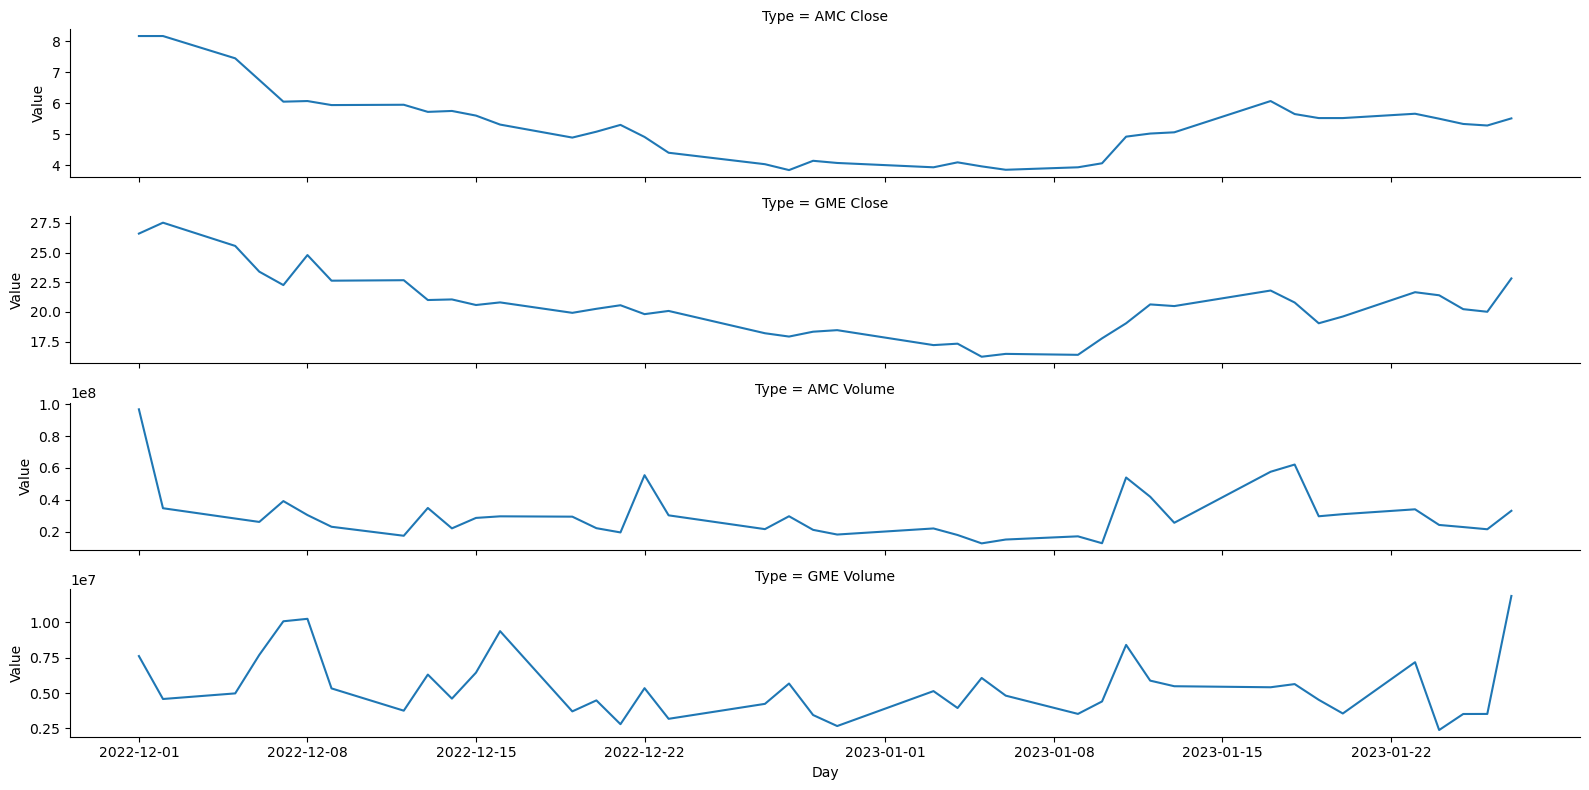

In [11]:
# FacetGrid goes here
df2_melt = df2.melt(
    id_vars='Day',
    value_vars=['AMC Close','GME Close','AMC Volume','GME Volume'],
    ignore_index=False)

df2_melt.rename(columns={'value':'Value','variable':'Type'},inplace=True)

df2_melt['Day'] = df2['Day'].dt.strftime("%d/%m/%Y")
df2_melt['Day'] = pd.to_datetime(df2['Day'], format="%d/%m/%Y")

grid = sns.FacetGrid(df2_melt, row="Type", height=2, aspect=8, sharey=False)
grid.map(sns.lineplot, "Day","Value")
plt.show()

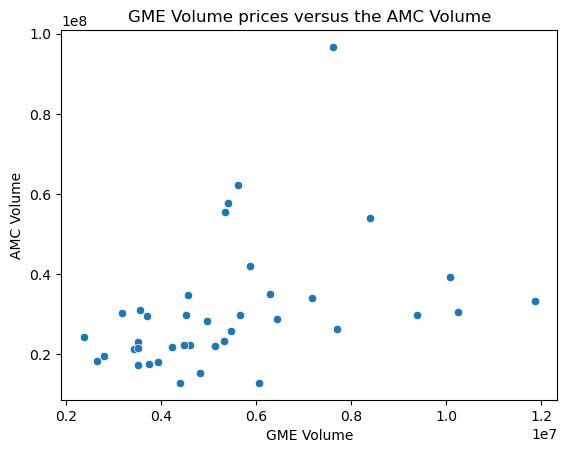

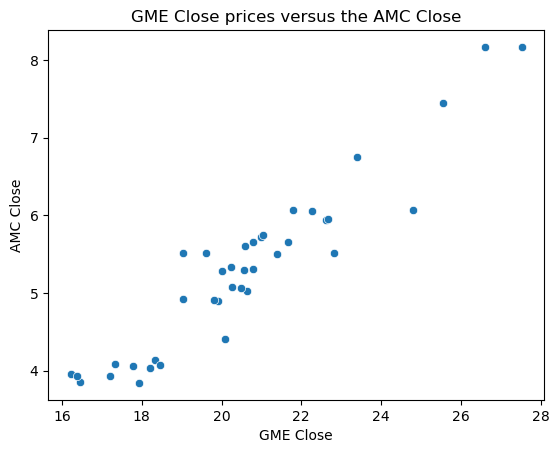

In [12]:
# Scatterplot goes here
sns.scatterplot(data=df2, x="GME Volume", y="AMC Volume").set(title='GME Volume prices versus the AMC Volume')
plt.show()

sns.scatterplot(data=df2, x="GME Close", y="AMC Close").set(title='GME Close prices versus the AMC Close')
plt.show()

### Questions

Answer the following questions:

1. Looking at your FacetGrid, identify any major spikes and/or dips in the closing prices or volume traded. Around what months/days does this occur? There may be several.

2. Search for some newsources to find out what happened during these times with respect to the AMC and GME that could account for the major spikes and/or dips. In a few sentences, provide an explanation of what was happening with these stocks. Include the reference(s) in your response. 

3. Looking at your Scatterplot, does there appear to be any relationship between the AMC and GME stocks with respect to closing prices and/or volume?

4. If a relationships does occur between the AMC and GME stocks with respect to the closing prices and/or volume, search for some newsources to find out anything that would relate AMC to GME and/or vice versa. In a few sentences, provide an explanation of how these two stocks might be related. Include the reference(s) in your response. 

### Answers

1. It's a bit difficult to discern but there seem to be peaks during the first week and last week of each month. There seemed to be a dip between the end of Dec 2022 and Beginning of 2023. 
2. 
   AMC -- AMC calls expiring on Dec 2, 2022 with prices of USD 8-9 were the most traded contracts during the Dec 1 2022 trading season. 500k+ calls changed hands (3X+ than 20-day average of 163k). Reference: https://www.bloomberg.com/news/articles/2022-12-01/amc-entertainment-jumps-most-since-may-as-bullish-bets-surge?leadSource=uverify%20wall
   
   
   GME -- Watchful waiting for the Q3 earnings announcement on Dec 7, 2022. Public expected improvement in profts after mgmt stated increased focus on cutting costs. Reference: https://investorplace.com/2022/11/dear-gme-stock-fans-mark-your-calendars-for-dec-7/

3. Weak relationship between Volume prices but strong, almost perfectly linear relationship between Close prices. 
4. They are meme stocks! And they tend to follow similar  Close price patterns. Reference: https://capital.com/meme-stocks-amc-gamestop-bbby-2023